<font size = 6; color = "darkblue"><b>Project Problem Statement - Auto-mpg Analysis</b></font><br>
***

<font size=4><b>Context</b></font>

The shifting market conditions, globalization, cost pressure, and volatility are leading to a change in the automobile market landscape. The emergence of data, in conjunction with machine learning in automobile companies, has paved a way that is helping bring operational and business transformations.

The automobile market is vast and diverse, with numerous vehicle categories being manufactured and sold with varying configurations of attributes such as displacement, horsepower, and acceleration. We aim to find combinations of these features that can clearly distinguish certain groups of automobiles from others through this analysis, as this will inform other downstream processes for any organization aiming to sell each group of vehicles to a slightly different target audience.

You are a Data Scientist at SecondLife which is a leading used car dealership with numerous outlets across the US. Recently, they have started shifting their focus to vintage cars and have been diligently collecting data about all the vintage cars they have sold over the years. The Director of Operations at SecondLife wants to leverage the data to extract insights about the cars and find different groups of vintage cars to target the audience more efficiently.

<font size=4><b>Objective</b></font>

The objective of this problem is to explore the data, extract meaningful insights, and find different groups of vehicles in the data by using dimensionality reduction techniques like PCA and t-SNE.

<font size=4><b>Data Description</b></font>

There are 8 variables in the dataset:
<ul>
    <li>mpg: miles per gallon</li>
    <li>cyl: number of cylinders</li>
    <li>disp: engine displacement (cu. inches) or engine size</li>
    <li>hp: horsepower</li>
    <li>wt: vehicle weight (lbs.)</li>
    <li>acc: time taken to accelerate from 0 to 60 mph (sec.)</li>
    <li>yr: model year</li>
    <li>car name: car model name</li>
</ul>

<font size=3><b>Import the libraries</b></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Import PCA and t-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Library to suppress warnings, don't make a practice of using it, it's bad practice

import warnings
warnings.filterwarnings('ignore')

<font size=3><b>Loading the dataset</b></font>

In [2]:
# Loading the dataset
df = pd.read_csv('auto-mpg.csv')

In [3]:
# Looking at the first 5 records
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name
0,18.0,8,307.0,130,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,ford torino


<div class="alert alert-block alert-danger">
    <font color='black' size=5><b>Processing the Data</b></font>
</div>

<font size=3><b>Check dataset info</b></font>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   car name      398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Observations:</b></font><br>
    <ul>
        <li>There are <b>398 observations and 8 columns</b> in the data.</li>
        <li> All the columns have 2940 non-null values, i.e., <b>there are no missing values in the data.</b></li>
        <li><b>All the columns are numeric except "horsepower" and "car name"</b>.</li>
        <li>The <b>datatype for 'horsepower' is expected to be 'numeric' and the datatype is 'object'</b>
    </ul>
</div>

<font size=3><b>Let's check the unique values in each column</b></font>

In [5]:
# Checking the count of unique values in each column
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
car name        305
dtype: int64

<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Observations:</b></font><br>
    <ul>
        <li>Car name is not unique, therefore it will not be dropped initially</li>
        <li>"car name" and "model year" have a space in the name</li>
    </ul>
</div>

<font size=3><b>Replace the " " with "_" for columns "car name" and "model year"</b></font>

In [6]:
# Remove the space from "model year" and "car name"
df.columns = df.columns.str.replace(' ', '_')

# Make sure the spaces are gone
for col in df.columns:
    print(col)

mpg
cylinders
displacement
horsepower
weight
acceleration
model_year
car_name


<font size=3><b>Determine non-integer values for horsepower</b></font>

In [7]:
# Create a list of unique non-integers from horsepower values
non_int = []
for item in df['horsepower']:
    for subitem in item.split():
        if subitem.isdigit():
            continue;
        elif subitem not in non_int:
            non_int.append(subitem)
print(pd.unique(non_int))

['?']


<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Observations:</b></font><br>
    <ul>
        <li>A <font size=3 color=red><b>'?'</b></font> is the only non-numeric value used in horsepower</li>
    </ul>
</div>

<font size=3><b>Find the rows with a '?'</b></font>

In [8]:
print(df['horsepower'].value_counts()['?'])
df.loc[df['horsepower'] == '?']

6


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
32,25.0,4,98.0,?,2046,19.0,71,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,amc concord dl


<font size=3><b>Find car_names with a '?' in horsepower</b></font>

In [9]:
hp_NAN = df.loc[df['horsepower'] == '?'].car_name
for item in hp_NAN:
    print(item)

ford pinto
ford maverick
renault lecar deluxe
ford mustang cobra
renault 18i
amc concord dl


<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Observations:</b></font><br>
    <ul>
        <li>Horsepower is represented as an integer in the automobile industry, and <b>there are non-integer values in the column 'horsepower'</b></li>
        <li>There is <b>only non-integer value of horsepower is '?'</b>.</li>
        <li>There are 6 occurences of '?'</li>
        <li>The '?' needs to be replace</li>
    </ul>
</div>

<font size=3><b>Calculate the mean horsepower using cars with similar features and replace the '?' in horsepower.</b></font>

In [10]:
print('Current value for verification')
df.loc[(df.car_name == 'ford pinto') & (df.horsepower == '?')]

Current value for verification


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
32,25.0,4,98.0,?,2046,19.0,71,ford pinto


In [11]:
# Calculate the mean of Ford Pintos
hp_df = pd.DataFrame(df[(df.car_name == 'ford pinto') & (df.horsepower != '?')])
hp_df['horsepower'] = hp_df['horsepower'].astype(int)
pinto_hp = int(hp_df['horsepower'].mean())
print('\nThe mean horsepower for similar vehicles is', pinto_hp, '\n')

# Replace the '?' with the mean
i = 0
for i in range(len(df)):
    if (df['car_name'][i] == 'ford pinto') and (df['horsepower'][i] == '?'):
        df['horsepower'][i] = pinto_hp

# Verify that the '?' was replaced
df[(df.car_name == 'ford pinto')]


The mean horsepower for similar vehicles is 83 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
32,25.0,4,98.0,83,2046,19.0,71,ford pinto
112,19.0,4,122.0,85,2310,18.5,73,ford pinto
130,26.0,4,122.0,80,2451,16.5,74,ford pinto
168,23.0,4,140.0,83,2639,17.0,75,ford pinto
174,18.0,6,171.0,97,2984,14.5,75,ford pinto
206,26.5,4,140.0,72,2565,13.6,76,ford pinto


In [12]:
print('Current value for verification')
df.loc[(df.car_name == 'ford maverick') & (df.horsepower == '?')]

Current value for verification


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
126,21.0,6,200.0,?,2875,17.0,74,ford maverick


In [13]:
# Calculate the mean of Ford Mavericks
hp_df = pd.DataFrame(df[(df.car_name == 'ford maverick') & (df.horsepower != '?')])
hp_df['horsepower'] = hp_df['horsepower'].astype(int)
mav_hp = int(hp_df['horsepower'].mean())
print('\nThe mean horsepower for similar vehicles is', mav_hp, '\n')

# Replace the '?' with the mean
i = 0
for i in range(len(df)):
    if (df['car_name'][i] == 'ford maverick') and (df['horsepower'][i] == '?'):
        df['horsepower'][i] = mav_hp
        
# Verify that the '?' was replaced
df[(df.car_name == 'ford maverick')]


The mean horsepower for similar vehicles is 81 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
17,21.0,6,200.0,85,2587,16.0,70,ford maverick
100,18.0,6,250.0,88,3021,16.5,73,ford maverick
126,21.0,6,200.0,81,2875,17.0,74,ford maverick
155,15.0,6,250.0,72,3158,19.5,75,ford maverick
193,24.0,6,200.0,81,3012,17.6,76,ford maverick


In [14]:
print('Current value for verification')
df.loc[(df.car_name == 'renault lecar deluxe') & (df.horsepower == '?')]

Current value for verification


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
330,40.9,4,85.0,?,1835,17.3,80,renault lecar deluxe


In [15]:
# Renault lecar delux has only 1 row with '?' as the horsepower, taking the mean of cars with similar features
hp_df = pd.DataFrame(df[(df.cylinders == 4) & (df.displacement == 85.0) & ((df.acceleration >= 16.8) & (df.acceleration <= 19.2)) & (df.horsepower != '?')])
hp_df['horsepower'] = hp_df['horsepower'].astype(int)
lecar_hp = int(hp_df['horsepower'].mean())
print('\nThe mean horsepower for similar vehicles is', lecar_hp, '\n')

# Replace the '?' with the mean
i = 0
for i in range(len(df)):
    if (df['car_name'][i] == 'renault lecar deluxe') and (df['horsepower'][i] == '?'):
        df['horsepower'][i] = lecar_hp
        
# Verify that the '?' was replaced       
df[(df.car_name == 'renault lecar deluxe')]


The mean horsepower for similar vehicles is 68 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
330,40.9,4,85.0,68,1835,17.3,80,renault lecar deluxe


In [16]:
print('Current value for verification')
df.loc[(df.car_name == 'ford mustang cobra') & (df.horsepower == '?')]

Current value for verification


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
336,23.6,4,140.0,?,2905,14.3,80,ford mustang cobra


In [17]:
# Ford mustang cobra has only 1 row with '?' as the horsepower, taking the mean of cars with similar features
hp_df = pd.DataFrame(df[(df.cylinders == 4) & (df.displacement == 140.0) & ((df.acceleration >= 14.0) & (df.acceleration <= 16.0)) & (df.horsepower != '?')])
hp_df['horsepower'] = hp_df['horsepower'].astype(int)
cobra_hp = int(hp_df['horsepower'].mean())
print('\nThe mean horsepower for similar vehicles is', cobra_hp, '\n')

# Replace the '?' with the mean
i = 0
for i in range(len(df)):
    if (df['car_name'][i] == 'ford mustang cobra') and (df['horsepower'][i] == '?'):
        df['horsepower'][i] = cobra_hp
        
# Verify that the '?' was replaced
df[(df.car_name == 'ford mustang cobra')]


The mean horsepower for similar vehicles is 89 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
336,23.6,4,140.0,89,2905,14.3,80,ford mustang cobra


In [18]:
print('Current value for verification')
df.loc[(df.car_name == 'renault 18i') & (df.horsepower == '?')]

Current value for verification


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
354,34.5,4,100.0,?,2320,15.8,81,renault 18i


In [19]:
# Renault 18i has only 1 row with '?' as the horsepower, taking the mean of cars with similar features
hp_df = pd.DataFrame(df[((df.acceleration >= 15.0) & (df.acceleration <= 17.0)) & (df.cylinders == 4) & ((df.weight >= 2250) & (df.weight <= 2375)) & (df.horsepower != '?')])
hp_df['horsepower'] = hp_df['horsepower'].astype(int)
ren18i_hp = int(hp_df['horsepower'].mean())
print('\nThe mean horsepower for similar vehicles is', ren18i_hp, '\n')

# Replace the '?' with the mean
i = 0
for i in range(len(df)):
    if (df['car_name'][i] == 'renault 18i') and (df['horsepower'][i] == '?'):
        df['horsepower'][i] = ren18i_hp

# Verify that the '?' was replaced
df[(df.car_name == 'renault 18i')]


The mean horsepower for similar vehicles is 86 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
354,34.5,4,100.0,86,2320,15.8,81,renault 18i


In [20]:
print('Current value for verification')
df.loc[(df.car_name == 'amc concord dl') & (df.horsepower == '?')]

Current value for verification


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
374,23.0,4,151.0,?,3035,20.5,82,amc concord dl


In [21]:
# Amc concord dl has only 1 row with '?' as the horsepower, taking the mean of cars with similar features
hp_df = pd.DataFrame(df[((df.acceleration >= 19.0) & (df.acceleration <= 21.0)) & (df.cylinders == 4) & ((df.weight >= 2975) & (df.weight <= 3085)) & (df.horsepower != '?')])
hp_df['horsepower'] = hp_df['horsepower'].astype(int)
amc_hp = int(hp_df['horsepower'].mean())
print('\nThe mean horsepower for similar vehicles is', amc_hp, '\n')

# Replace the '?' with the mean
i = 0
for i in range(len(df)):
    if (df['car_name'][i] == 'amc concord dl') and (df['horsepower'][i] == '?'):
        df['horsepower'][i] = amc_hp
        
# Verify that the '?' was replaced
df[(df.car_name == 'amc concord dl')]



The mean horsepower for similar vehicles is 88 



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,car_name
374,23.0,4,151.0,88,3035,20.5,82,amc concord dl


<font size=3><b>Convert the horsepower column from str to int</b></font>

In [22]:
# Convert the horsepower column from object to int
df['horsepower'] = df['horsepower'].astype(int)

In [23]:
# check to make sure the horsepower variable is no longer an object
df['horsepower'].dtypes

dtype('int32')

<font size=3><b>At this point, car_name is insignificant, dropping the column</b></font>

In [24]:
df.drop(columns = "car_name", inplace = True)

<font size=3><b>Check the Dtypes, make sure horsepower is not an object</b></font>

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    int32  
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
dtypes: float64(3), int32(1), int64(3)
memory usage: 20.3 KB


<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Observations:</b></font><br>
    <ul>
        <li>My target, dependent variable is mpg, all other variables are indenpendent variables</li>
        <li>All columns are now numeric</li>
    </ul>
</div>

<div class="alert alert-block alert-danger">
    <font color='black' size=5><b>Exploratory Data Analysis</b></font>
</div>

<font size=3 color=black><b>Univariate analysis of numerical columns</b>

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.138191,38.302896,46.0,75.250,92.0,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Observations:</b></font><br>
    <ul>
        <li>The average car year is 1976</li>
        <li>Weight, horsepower, and displacement, mpg max is significantly more that 75% of the respective data indicating a right skew and may have outliers</li>
        <li>The average number of <b>engine cyclinders is 5</b></li>
    </ul>
</div>

<font size=3 color=black><b>Checking the distribution and outliers for each column in the data</b>

mpg
Skew : 0.46


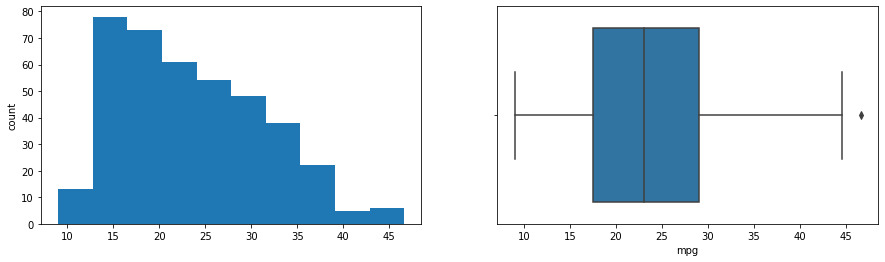

cylinders
Skew : 0.53


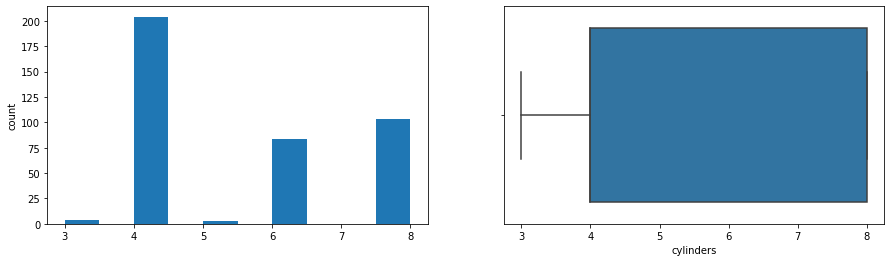

displacement
Skew : 0.72


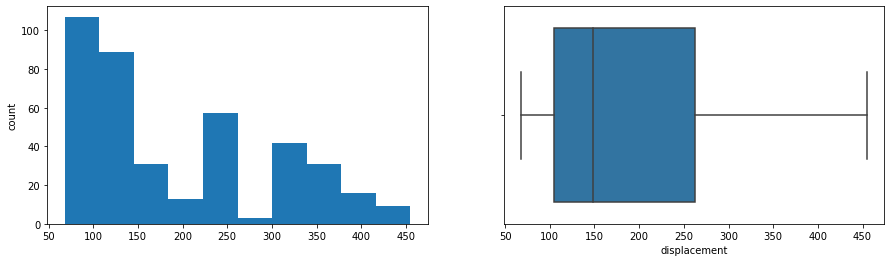

horsepower
Skew : 1.11


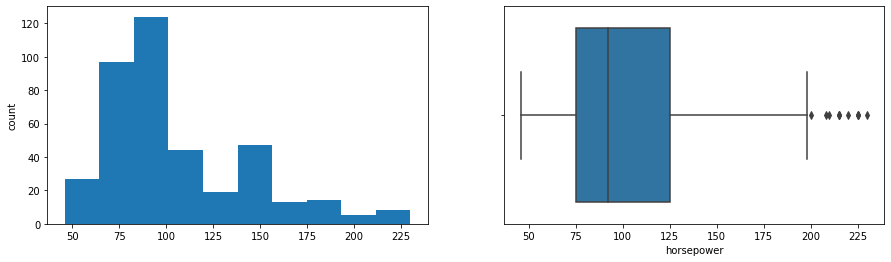

weight
Skew : 0.53


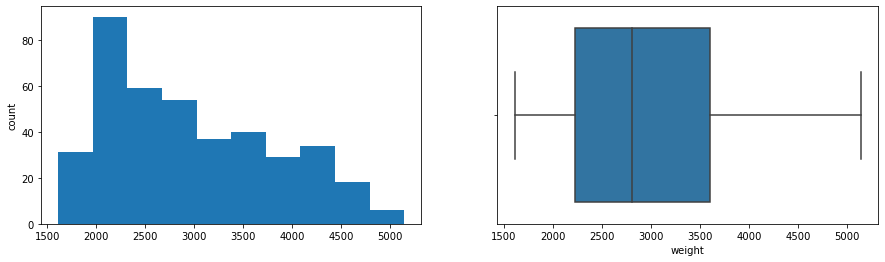

acceleration
Skew : 0.28


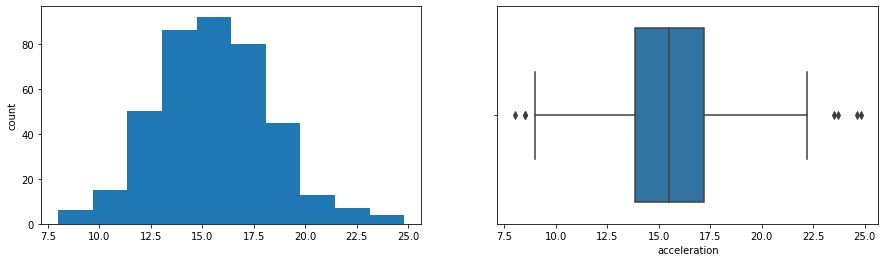

model_year
Skew : 0.01


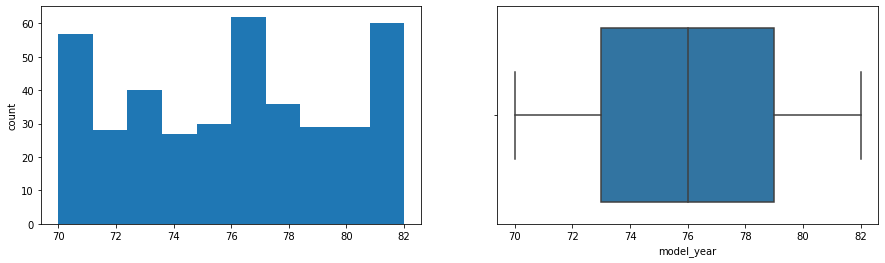

In [27]:
cont_cols = df.columns
for col in cont_cols:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(bins = 10, grid = False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x = df[col])
    plt.show()

<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Observations:</b></font><br>
    <ul>
        <li>4-cyclinder have the highest count of data points.</li>
        <li>Acceleration is close to a normal standard distribution, but has outliers.</li>
        <li>The distribution plots show that mpg, displacement, horsepower, and weight are right-skewed</li>
        <li>Evidence from boxplots shot there are outliers for acceleration, horsepower, and mpg.</li>
        <li>mgp has only one right-side outlier</li>
        <li>Horsepower has a moderate right-skew 
    </ul>
</div>

<font size=3 color=black><b>Looking for relationships</b>

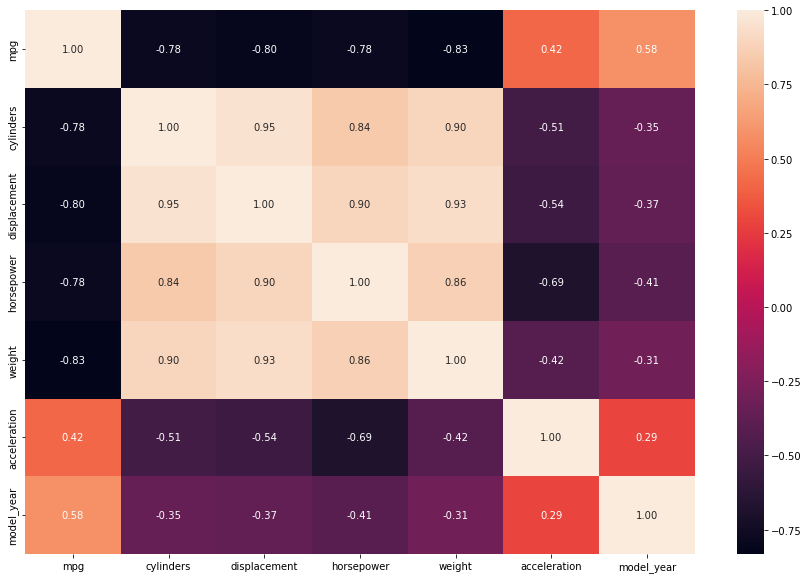

In [28]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f')
plt.show()

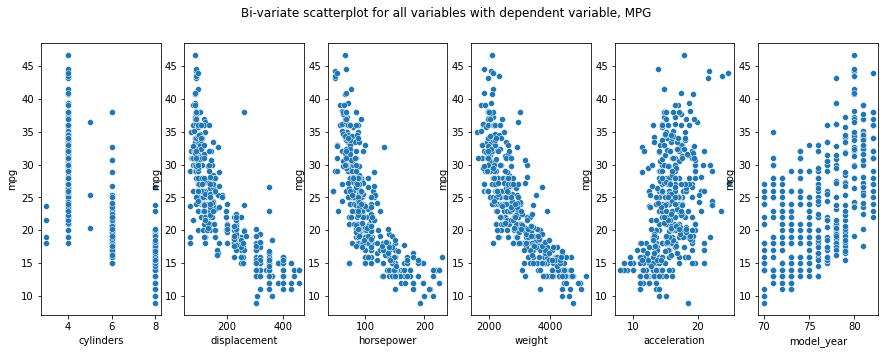

In [29]:
fig, axes = plt.subplots(1, 6, figsize = (15, 5))
  
fig.suptitle('Bi-variate scatterplot for all variables with dependent variable, MPG')
sns.scatterplot(x = 'cylinders', y = 'mpg', data = df, ax = axes[0]);
sns.scatterplot(x = 'displacement', y = 'mpg', data = df, ax = axes[1]);
sns.scatterplot(x = 'horsepower', y = 'mpg', data = df, ax = axes[2]);
sns.scatterplot(x = 'weight', y = 'mpg', data = df, ax = axes[3]);
sns.scatterplot(x = 'acceleration', y = 'mpg', data = df, ax = axes[4]);
sns.scatterplot(x = 'model_year', y = 'mpg', data = df, ax = axes[5]);

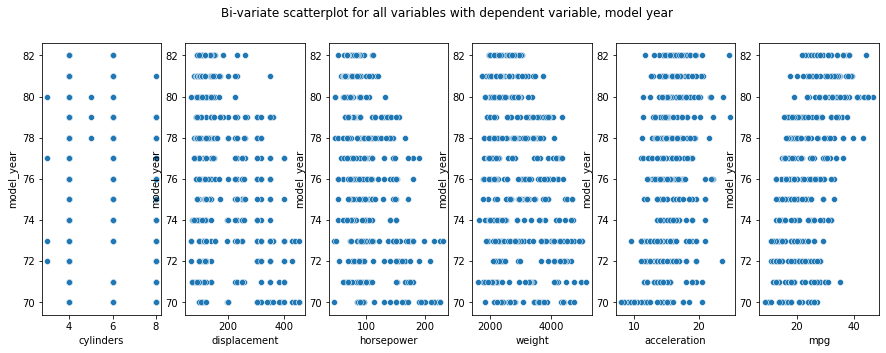

In [30]:
fig, axes = plt.subplots(1, 6, figsize = (15, 5))
  
fig.suptitle('Bi-variate scatterplot for all variables with dependent variable, model year')
sns.scatterplot(x = 'cylinders', y = 'model_year', data = df, ax = axes[0]);
sns.scatterplot(x = 'displacement', y = 'model_year', data = df, ax = axes[1]);
sns.scatterplot(x = 'horsepower', y = 'model_year', data = df, ax = axes[2]);
sns.scatterplot(x = 'weight', y = 'model_year', data = df, ax = axes[3]);
sns.scatterplot(x = 'acceleration', y = 'model_year', data = df, ax = axes[4]);
sns.scatterplot(x = 'mpg', y = 'model_year', data = df, ax = axes[5]);

<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Observations:</b></font><br>
    <ul>
        <li>Cylinders, displacement, horsepower, and weight <b>negatively correlate with mpg</b></li>
        <li>Model_year and accerleration have a positive correlation on mpg</li>
        <li>Need to further explore why model year and acceleration positively correltate with mpg outside of our provided independent variables.</li>
    </ul>
</div>

<font size=3 color=black><b>Let's look at model_year impact on mpg, and acceleration</b>

In [31]:
df.groupby(['model_year']).agg(['mean'])[['mpg', 'acceleration', 'displacement', 'weight']]

,mpg,acceleration,displacement,weight
,mean,mean,mean,mean
model_year,,,,
70,17.689655,12.948276,281.413793,3372.793103
71,21.250000,15.142857,209.750000,2995.428571
72,18.714286,15.125000,218.375000,3237.714286
73,17.100000,14.312500,256.875000,3419.025000
74,22.703704,16.203704,171.740741,2877.925926
75,20.266667,16.050000,205.533333,3176.800000
76,21.573529,15.941176,197.794118,3078.735294
77,23.375000,15.435714,191.392857,2997.357143


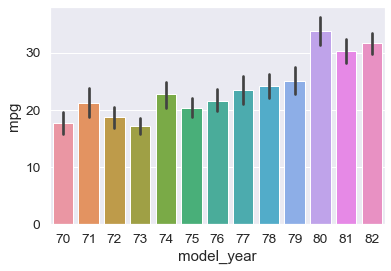

In [32]:
sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1.25, color_codes=True, rc=None)
ax = sns.barplot(x='model_year', y='mpg', data=df)

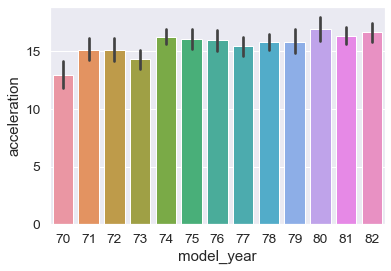

In [33]:
sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1.25, color_codes=True, rc=None)
ax = sns.barplot(x='model_year', y='acceleration', data=df)

<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Observations:</b></font><br>
    <ul>
        <li>The data suggests that car manufactures made improvement to a cars performance with respect to mpg from older cars to newer cars</li>
        <li>There was a big change in 1980 where the mean mpg increased from 25 to 34 miles per gallon</li>
        <li>There were significant drops in displacement in weight, meaning the car can accelerate faster using less horsepower.        
    </ul>
</div>

<div class="alert alert-block alert-danger">
    <font color='black' size=5><b>Principal Component Analysis</b></font>
</div>

In [34]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [35]:
df_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
0,-0.706439,1.498191,1.090604,0.676042,0.630870,-1.295498,-1.627426
1,-1.090751,1.498191,1.503514,1.590961,0.854333,-1.477038,-1.627426
2,-0.706439,1.498191,1.196232,1.198853,0.550470,-1.658577,-1.627426
3,-0.962647,1.498191,1.061796,1.198853,0.546923,-1.295498,-1.627426
4,-0.834543,1.498191,1.042591,0.937447,0.565841,-1.840117,-1.627426


In [36]:
# Defining the number of principal components to generate
n = df_scaled.shape[1]

# Finding principal components for the data
pca1 = PCA(n_components = n, random_state = 1)
df_pca = pd.DataFrame(pca1.fit_transform(df_scaled))

# The percentage of variance explained by each principal component
exp_var = pca1.explained_variance_ratio_

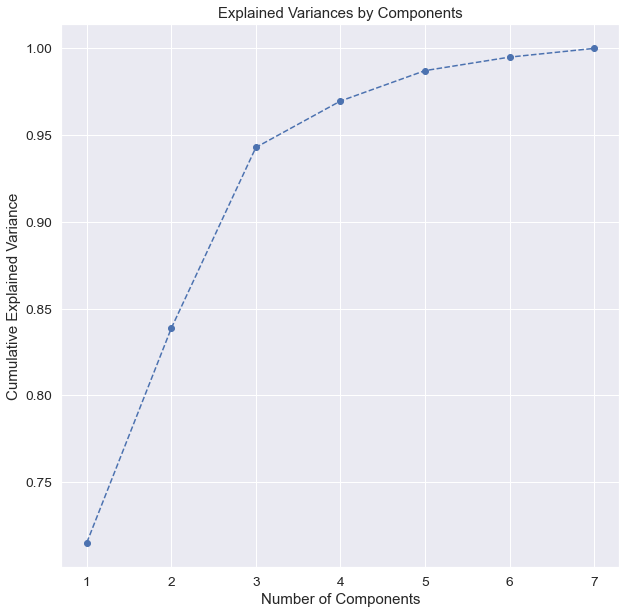

In [37]:
# Plotting the explained cumulative variance by principal components
plt.figure(figsize = (10, 10))
plt.plot(range(1, 8), pca1.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variances by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()

In [38]:
# Finding the least number of components that can explain more than 70% variance
sum = 0

for ix, i in enumerate(exp_var):
    sum = sum + i
    if(sum>0.80):
        print("Number of PCs that explain at least 80% variance:", ix + 1)
        break

Number of PCs that explain at least 80% variance: 2


<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Observations:</b></font><br>
    <ul>
        <li>Using PCA, the features were <b>reduced from 7 to two pricipal components</b>.</li>
        <li><b>The first two components explain approximately 80% of the original variance.</b></li>
        <li>That is approximately a <b>71% reduction in the dimensionality</b> of the dataset with <b>only a loss of 20% in variance</b>.</li>
    </ul>
</div>

<font size=3><b>Reviewing principal components as a linear combination of the original features</b></font>

In [39]:
pc_comps = ['PC1', 'PC2']
df_pca = pd.DataFrame(np.round(pca1.components_[:2,:],2), index = pc_comps, columns = df_scaled.columns)
def color_high(val):
    if val < -0.41:                    
        return 'background: pink'
    elif val > 0.41:
        return 'background: skyblue'   
df_pca.T.style.applymap(color_high)

,PC1,PC2
mpg,-0.400000,-0.210000
cylinders,0.420000,-0.190000
displacement,0.430000,-0.180000
horsepower,0.420000,-0.090000
weight,0.410000,-0.220000
acceleration,-0.280000,0.020000
model_year,-0.230000,-0.910000


<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Observations:</b></font><br>
    <ul>
        <li>Each principal component is a linear combination of the original features</li>
        <li>The equation for PC1 in the following manner:</li>
        <font color='blue'><b>PC1 = -0.25 * mpg + 0.42 * cylinders + 0.43 * displacement + 0.42 * horsepower + 0.41 * weight - 0.28 *   acceleration - .23 * model_year</b></font>
        <li>The <b>first two principal components pick up 83%</b> of the variability in the data</li>
        <li>Only those <b>weights with an absolute value greater than 0.41 (median of PC1 weights)</b> are significant thus <b>cylinders, displacement, horsepower, and model_year are likely to be the most important features.</b></li>    
    </ul>
</div>

<div class="alert alert-block alert-danger">
    <font color='black' size=5><b>T-distributed stochastic neighbor embedding (t-SNE)</b></font>
</div>

In [40]:
# Fitting t-SNE with number of components equal to 2 
tsne = TSNE(n_components = 2, random_state = 1)
df_tsne = tsne.fit_transform(df_scaled)

In [41]:
# Converting the embeddings to a dataframe
df_tsne = pd.DataFrame(df_tsne, columns = ['PC1', 'PC2'])

<font size=3><b>2D visualization</b></font>

In [42]:
# Let's assign points to 4 different groups
def grouping(x):
    first_component = x['PC1']
    
    second_component = x['PC2']
    
    if (first_component < -12) and (second_component < -12):
        return 'group_1'
    
    elif (first_component < 0) and (second_component < 10): 
        return 'group_2'
    
    else: 
        return 'group_3'

In [43]:
df_tsne['groups'] = df_tsne.apply(grouping, axis = 1)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

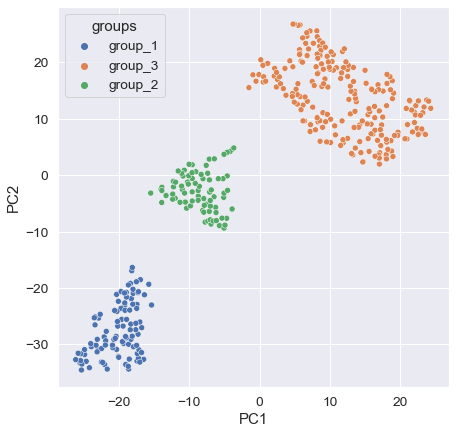

In [44]:
# Scatter plot for two components with hue
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'PC1', y = 'PC2', data = df_tsne, hue = 'groups')

<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Observations:</b></font><br>
    <ul>
        <li>We can clearly see three groups in the data</li>
    </ul>
</div>

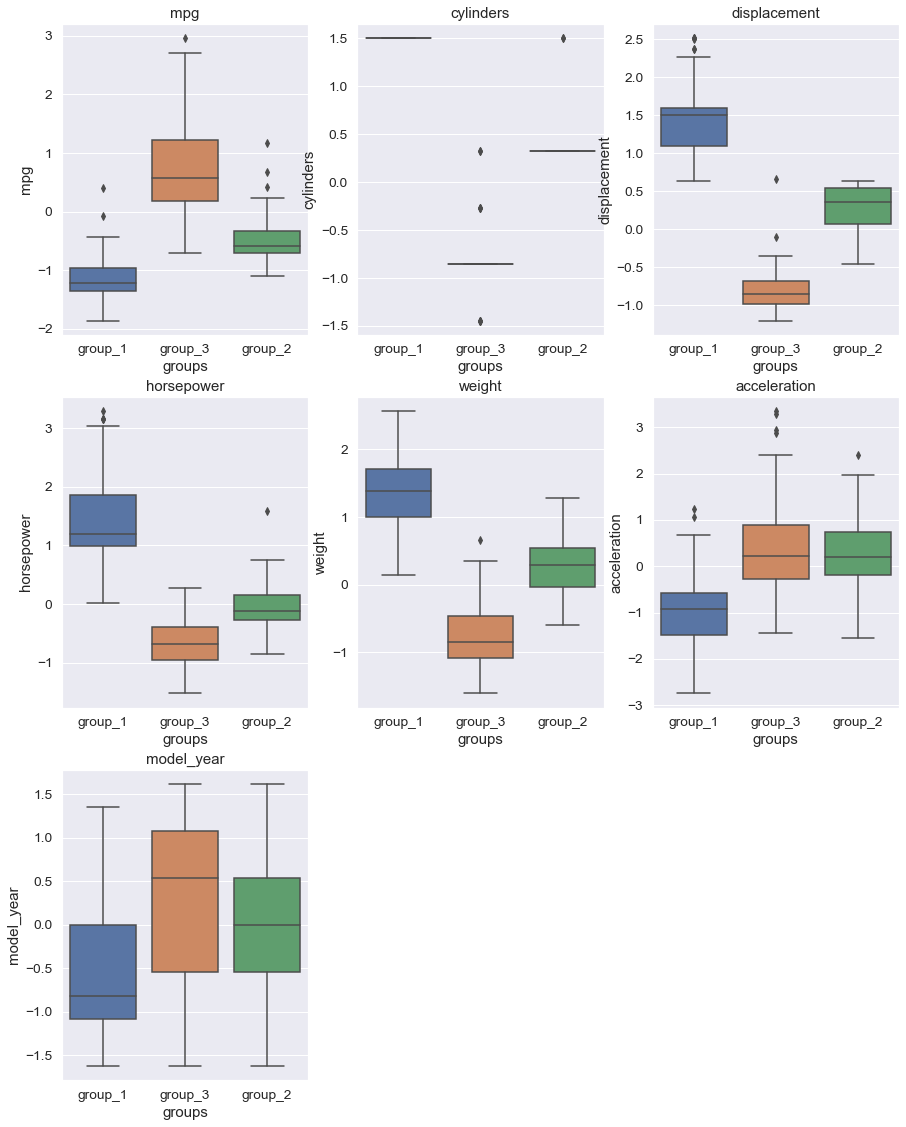

In [45]:
all_col = df_scaled.columns.tolist()
plt.figure(figsize = (15, 40))

for i, variable in enumerate(all_col):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(y=df_scaled[variable], x=df_tsne['groups'])
    #plt.tight_layout()
    plt.title(variable)
plt.show()

<div class="alert alert-block alert-info">
    <font size=4 color=black><b>Observations:</b></font><br>
    The data suggests that car manufacturers are producing newer cars that are lighter, using smaller engines that have faster accelerations with better fuel efficiency. The data has three clear groups with varying characteristics.
    <ul>
        <li><b>Group 1 represents older cars with larger engines producing the most horsepowe.</b>The vehicles in this group have larger engine displacements that correlate with the car's weight and horsepower. These features require an engine to work harder, consume more fuel, and thus are the least efficient concerning miles per gallon (MPG).</li><br>
        <li>Group 2 represents a wide variation of newer and older model cars. <b>The cars in group 2 have more acceleration and are more fuel-efficient.</b> The mean engine displacement, horsepower, and weight are lower than cars in Group 1 but have higher mean values for acceleration and mpg.</li><br>
        <li>Group 3 represents later model_year cars. This group of vehicles has the lowest mean horsepower, weight, and displacement but <b>is achieving the highest mean acceleration and mpg of all three groups</b>. Group 3 has fewer variations for displacement and horsepower, indicating the engines are similar in size and power.</li><br>
        <li><b>In 1980, there was a big increase in fuel efficiency</b></li>
    </ul>
</div>